/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


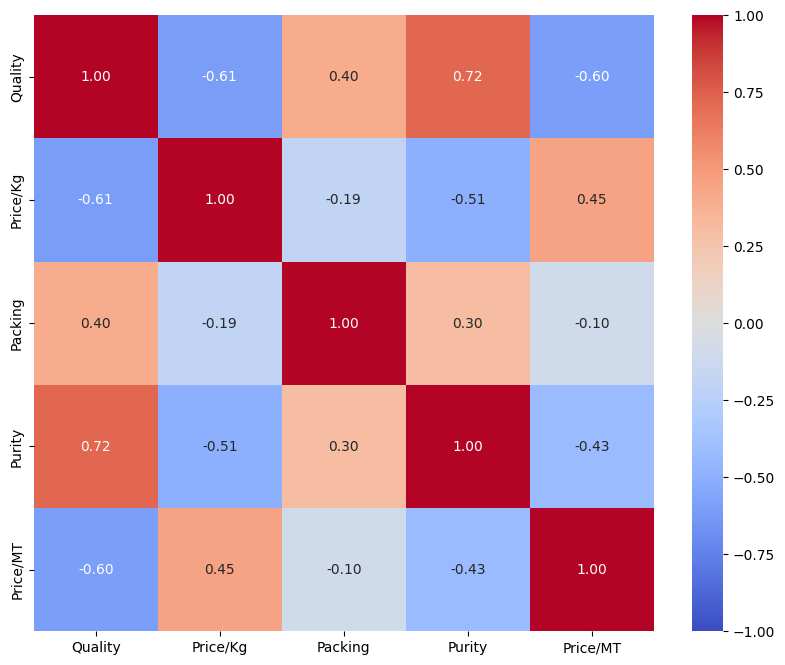

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
df=pd.read_csv('thesis dataset copy - Sheet1 (5) - Copy.csv')
df=df.drop(columns=["Date"])
columns_to_one_hot_encode=[
    'Chemical Name', 'Chemical Nature','Supplier Country','Storing Container','Supplier Company','Composition','Usage'
]
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_columns = one_hot_encoder.fit_transform(df[columns_to_one_hot_encode])
encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))


df = df.drop(columns=columns_to_one_hot_encode)
df=pd.concat([df,encoded_df],axis=1)
label_encoder = LabelEncoder()
#df.fillna(df.mean(), inplace=True)
df['Quality'] = label_encoder.fit_transform(df['Quality'])
correlation_matrix = df.corr()
pd=pd.DataFrame(df)
output_column = 'Quality'
selected_features = ['Price/Kg', 'Packing', 'Purity', 'Price/MT']  # replace with your actual feature names

# Create a list that includes the output column and the selected features
columns_to_include = [output_column] + selected_features

# Compute the correlation matrix for the selected columns
corr_matrix = df[columns_to_include].corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
#plt.title('Correlation Matrix with Output and Selected Features')
plt.show()
